In [193]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


In [270]:
import pandas as pd

In [271]:
df = pd.read_csv('raw_house_data.csv')

In [272]:
# Now let's check for missing data 

In [273]:

# Check for NaN in the entire data

In [274]:
value = df.isnull().values.any()


In [275]:
print(value)

True


In [276]:
# Counte NaN on entire DataFrame
result = df.isnull().sum()
print(result)

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64


In [277]:
#check the index of rows with no values
out = df[df['lot_acres'].isnull()].index.tolist()
print(out)
out1 = df[df['fireplaces'].isnull()].index.tolist()
print(out1)



[967, 1659, 2564, 2939, 3420, 3530, 4173, 4286, 4365, 4783]
[967, 1659, 1729, 1730, 1863, 2025, 2357, 2635, 2766, 2876, 2917, 2932, 2939, 3108, 3420, 3529, 3556, 3647, 3822, 4173, 4286, 4365, 4724, 4783, 4812]


In [278]:
print(df.describe())

                MLS    sold_price       zipcode    longitude     latitude  \
count  5.000000e+03  5.000000e+03   5000.000000  5000.000000  5000.000000   
mean   2.127070e+07  7.746262e+05  85723.025600  -110.912107    32.308512   
std    2.398508e+06  3.185556e+05     38.061712     0.120629     0.178028   
min    3.042851e+06  1.690000e+05  85118.000000  -112.520168    31.356362   
25%    2.140718e+07  5.850000e+05  85718.000000  -110.979260    32.277484   
50%    2.161469e+07  6.750000e+05  85737.000000  -110.923420    32.318517   
75%    2.180480e+07  8.350000e+05  85749.000000  -110.859078    32.394334   
max    2.192856e+07  5.300000e+06  86323.000000  -109.454637    34.927884   

         lot_acres         taxes  year_built     bedrooms   fireplaces  
count  4990.000000  5.000000e+03  5000.00000  5000.000000  4975.000000  
mean      4.661317  9.402828e+03  1992.32800     3.933800     1.885226  
std      51.685230  1.729385e+05    65.48614     1.245362     1.136578  
min       0.00

In [279]:
# drop all rows that have missing values
df=df.dropna()
#df.mask(df.eq('None')).dropna()

In [280]:
result = df.isnull().sum()
print(result)

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64


In [281]:
# count number of none 
print('sqrt_ft:', sum(df['sqrt_ft'] == 'None'))
print('garage:', sum(df['garage'] == 'None'))
print('bathrooms:', sum(df['bathrooms'] == 'None'))
print('floor_covering:',sum(df['floor_covering'] == 'None'))
print('kitchen_features:',sum(df['kitchen_features'] == 'None'))
print('year_built:',sum(df['year_built'] == 'None'))
print('bedrooms:',sum(df['bedrooms'] == 'None'))
print('taxes:',sum(df['taxes'] == 'None'))
print('lot_acres:',sum(df['lot_acres'] == 'None'))
print('HOA:',sum(df['HOA'] == 'None'))
print('longitude:',sum(df['longitude'] == 'None'))
print('latitude:',sum(df['latitude'] == 'None'))
print('MLS:',sum(df['MLS'] == 'None'))
print('sold_price:',sum(df['sold_price'] == 'None'))
print('zip_code:',sum(df['zipcode'] == 'None'))
print('fire_place:',sum(df['fireplaces'] == 'None'))

sqrt_ft: 29
garage: 7
bathrooms: 0
floor_covering: 0
kitchen_features: 32
year_built: 0
bedrooms: 0
taxes: 0
lot_acres: 0
HOA: 556
longitude: 0
latitude: 0
MLS: 0
sold_price: 0
zip_code: 0
fire_place: 0


In [282]:
value = df.isnull().values.any()
print(value)

False


In [283]:
#replace None with 0 in the following columns
df['garage'].replace('None', 0, inplace=True) # The building might be a commercial building hence it has no garage
df['bathrooms'].replace('None', 0, inplace=True) # The buikding might be a commercial building hence it has no bathroom
df['HOA'].replace('None', 0, inplace=True) # the building might not have a HOA, hence no value

In [284]:
#now we delete rows with None
df=df.mask(df.eq('None')).dropna()


In [285]:
df.head()

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   
5  21528016   3250000.0    85718 -110.910593  32.339090       1.67  27802.84   

   year_built  bedrooms bathrooms sqrt_ft garage  \
0        1941        13        10   10500      0   
1        1997         2         2    7300      0   
3        1930         7         5    9019      4   
4        1995         4         6    6396      3   
5        1999         3         4    6842      3   

                                    kitchen_features  fireplaces  \
0            Dishwasher, Freezer, Refrigerator, Oven         6.0   
1                       Dishwasher, Garbage Disposal         5.0   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...         4.0   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...         5.0   
5  Dishwasher, Garbage Disposal, Refrigerator, Mi...         5.0   

                 floor_covering  HOA  
0            Mexican Tile, Wood    0  
1          Natural Stone, Other    0  
3  Ceramic Tile, Laminate, Wood    0  
4              Carpet, Concrete   55  
5    Natural Stone, Wood, Other  422

In [286]:
print(df.describe())

                MLS    sold_price       zipcode    longitude     latitude  \
count  4.912000e+03  4.912000e+03   4912.000000  4912.000000  4912.000000   
mean   2.147728e+07  7.760996e+05  85724.167142  -110.910777    32.315079   
std    1.424469e+06  3.165812e+05     36.805409     0.120647     0.168394   
min    4.110917e+06  3.000000e+05  85118.000000  -112.520168    31.356362   
25%    2.141000e+07  5.850000e+05  85718.000000  -110.978365    32.280354   
50%    2.161743e+07  6.781000e+05  85737.000000  -110.922394    32.319142   
75%    2.180548e+07  8.400000e+05  85750.000000  -110.858460    32.396254   
max    2.192856e+07  5.300000e+06  86323.000000  -109.454637    34.927884   

         lot_acres         taxes   year_built     bedrooms   fireplaces  
count  4912.000000  4.912000e+03  4912.000000  4912.000000  4912.000000  
mean      4.242895  9.452678e+03  1992.239210     3.929357     1.880090  
std      45.969378  1.744797e+05    66.023857     1.143046     1.132477  
min       

In [287]:
len(df)

4912

In [288]:
#Here we create a function called count_number that counts the number of elements listed in a string
def count_number(string):
  result = len(string.split(','))
  return result

In [289]:
# Let's create a new feature number of kitchen features that counts the number of kitchen features
df['number_of_kitchen_feat'] = df['kitchen_features'].map(count_number)

In [290]:
# Let's create a new feature number of floor_covering that counts the number of floor coverings

df['number_of_floor_covering'] = df['floor_covering'].map(count_number)


In [291]:
def remove_comma_from_number(string):
  if type(string) == str and ',' in string:
    out = string.replace(',','')
    return out
  else:
    return string

In [292]:
# Here we remove comma from numbers. Eg 20,000-->> 20000
df['HOA'] = df['HOA'].map(remove_comma_from_number)


In [293]:
df.head()

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   
5  21528016   3250000.0    85718 -110.910593  32.339090       1.67  27802.84   

   year_built  bedrooms bathrooms sqrt_ft garage  \
0        1941        13        10   10500      0   
1        1997         2         2    7300      0   
3        1930         7         5    9019      4   
4        1995         4         6    6396      3   
5        1999         3         4    6842      3   

                                    kitchen_features  fireplaces  \
0            Dishwasher, Freezer, Refrigerator, Oven         6.0   
1                       Dishwasher, Garbage Disposal         5.0   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...         4.0   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...         5.0   
5  Dishwasher, Garbage Disposal, Refrigerator, Mi...         5.0   

                 floor_covering  HOA  number_of_kitchen_feat  \
0            Mexican Tile, Wood    0                       4   
1          Natural Stone, Other    0                       2   
3  Ceramic Tile, Laminate, Wood    0                       4   
4              Carpet, Concrete   55                       5   
5    Natural Stone, Wood, Other  422                       5   

   number_of_floor_covering  
0                         2  
1                         2  
3                         3  
4                         2  
5                         3

In [294]:
#convert float points to integer in count variables e.g bedrooms
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(float)
df['fireplaces'] = df['bathrooms'].astype(int)
df['garage'] = df['garage'].astype(float)
df['HOA'] = df['HOA'].astype(float)
df['sqrt_ft'] = df['sqrt_ft'].astype(float)

In [295]:
# Let's create a new feature that stores the count of the total number of features in the house

df['total_num_feat'] = df['bedrooms']+ df['bathrooms']+ df['garage']+ df['fireplaces']+df['number_of_kitchen_feat']+ df['number_of_floor_covering']

In [296]:
# Let's remove kitchen_features and floor_covering colunms
df = df.drop('kitchen_features', axis=1)
df = df.drop('floor_covering', axis=1)



In [297]:
#!pip install plotly_express
import plotly_express as px

In [298]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="year_built", zoom=1)

In [299]:
# This function calculates the eucledian distance between 2 points
from scipy.spatial import distance
def fxy(a, b):
    return distance.euclidean(a, b)

# Sedona

Sedona is a town in central Arizona, located about 30 miles south of the city of Flagstaff. The area is famous for its truly beautiful scenic view of the neighboring red rocks and national parks. Sedona is a very popular center of music and culture, with a number of annual events like St. Patrick's Parade, Sedona Bluegrass Festival, Sedona Marathon, and Sedona International Film Festival. Flagstaff Pulliam Airport is located about 26 miles away from the town. There are numerous hiking areas in the town such as Sedona Airport Loop Trail, Cow Pies Trailhead, Chapel Trail, Adobe Jack Trailhead, Little Horse Trailhead, Cathedral Rock Trailhead, and so on. Other attractions in the town include Tlaquepaque Arts & Shopping Village, Sedona Artist Market, Rowe Fine Art Gallery, and Chapel of the Holy Cross.

In [300]:
# Here we create a new feature which is the distance between the most expensive area to live in Arizona and the coordinates of each house 
df['distance_to_sedona'] = df.apply(lambda x: fxy([x['latitude'], x['longitude']], [34.871002, -111.760826]), axis=1)


In [301]:
df.head()

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   
5  21528016   3250000.0    85718 -110.910593  32.339090       1.67  27802.84   

   year_built  bedrooms  bathrooms  sqrt_ft  garage  fireplaces    HOA  \
0        1941        13       10.0  10500.0     0.0          10    0.0   
1        1997         2        2.0   7300.0     0.0           2    0.0   
3        1930         7        5.0   9019.0     4.0           5    0.0   
4        1995         4        6.0   6396.0     3.0           6   55.0   
5        1999         3        4.0   6842.0     3.0           4  422.0   

   number_of_kitchen_feat  number_of_floor_covering  total_num_feat  \
0                       4                         2            39.0   
1                       2                         2            10.0   
3                       4                         3            28.0   
4                       5                         2            26.0   
5                       5                         3            22.0   

   distance_to_sedona  
0            3.776817  
1            3.353986  
3            3.305587  
4            2.753813  
5            2.670857

In [302]:
print(df.describe())

                MLS    sold_price       zipcode    longitude     latitude  \
count  4.912000e+03  4.912000e+03   4912.000000  4912.000000  4912.000000   
mean   2.147728e+07  7.760996e+05  85724.167142  -110.910777    32.315079   
std    1.424469e+06  3.165812e+05     36.805409     0.120647     0.168394   
min    4.110917e+06  3.000000e+05  85118.000000  -112.520168    31.356362   
25%    2.141000e+07  5.850000e+05  85718.000000  -110.978365    32.280354   
50%    2.161743e+07  6.781000e+05  85737.000000  -110.922394    32.319142   
75%    2.180548e+07  8.400000e+05  85750.000000  -110.858460    32.396254   
max    2.192856e+07  5.300000e+06  86323.000000  -109.454637    34.927884   

         lot_acres         taxes   year_built     bedrooms    bathrooms  \
count  4912.000000  4.912000e+03  4912.000000  4912.000000  4912.000000   
mean      4.242895  9.452678e+03  1992.239210     3.929357     3.818709   
std      45.969378  1.744797e+05    66.023857     1.143046     1.310353   
min   

In [303]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [304]:
# lets do some satter plots to see the behaviour of data
from matplotlib import pyplot as plt

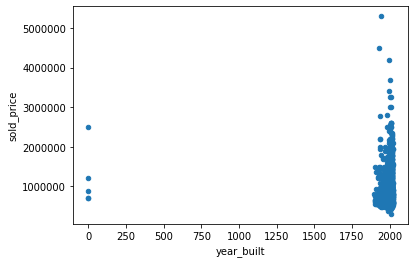

In [305]:
df.plot(kind = 'scatter', x = 'year_built', y = 'sold_price')

plt.show()

Makes no sense to have zero year, hence we have to delete the row that has and zero year.

In [306]:
df = df[df['year_built'] != 0]
print(len(df))

4907


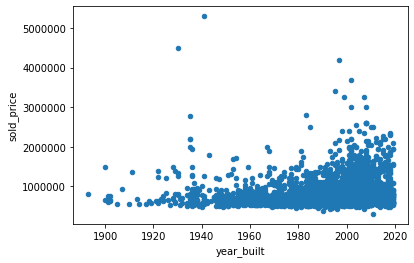

In [307]:
df.plot(kind = 'scatter', x = 'year_built', y = 'sold_price')

plt.show()

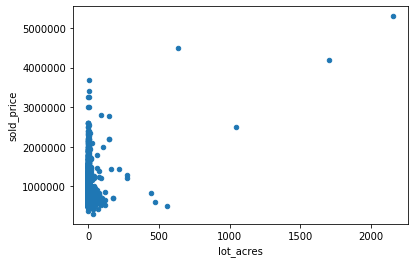

In [308]:
df.plot(kind = 'scatter', x = 'lot_acres', y = 'sold_price')

plt.show()

In [309]:
df = df[df['lot_acres'] != 0]
print(len(df))

4872


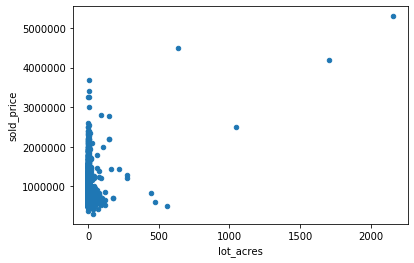

In [310]:
df.plot(kind = 'scatter', x = 'lot_acres', y = 'sold_price')

plt.show()

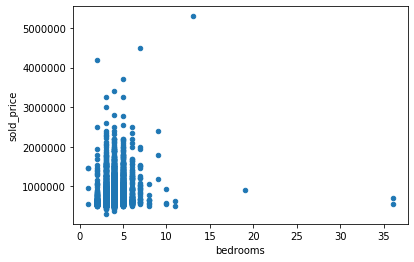

In [311]:
df.plot(kind = 'scatter', x = 'bedrooms', y = 'sold_price')

plt.show()

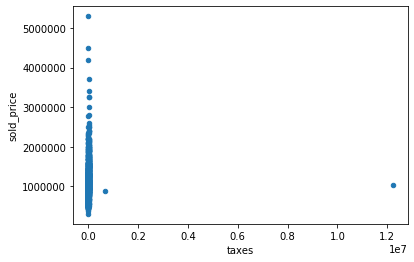

In [312]:
df.plot(kind = 'scatter', x = 'taxes', y = 'sold_price')

plt.show()

In [313]:
df.head()

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   
5  21528016   3250000.0    85718 -110.910593  32.339090       1.67  27802.84   

   year_built  bedrooms  bathrooms  sqrt_ft  garage  fireplaces    HOA  \
0        1941        13       10.0  10500.0     0.0          10    0.0   
1        1997         2        2.0   7300.0     0.0           2    0.0   
3        1930         7        5.0   9019.0     4.0           5    0.0   
4        1995         4        6.0   6396.0     3.0           6   55.0   
5        1999         3        4.0   6842.0     3.0           4  422.0   

   number_of_kitchen_feat  number_of_floor_covering  total_num_feat  \
0                       4                         2            39.0   
1                       2                         2            10.0   
3                       4                         3            28.0   
4                       5                         2            26.0   
5                       5                         3            22.0   

   distance_to_sedona  
0            3.776817  
1            3.353986  
3            3.305587  
4            2.753813  
5            2.670857

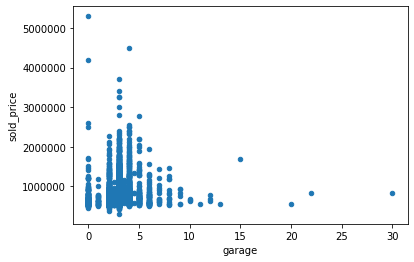

In [314]:
df.plot(kind = 'scatter', x = 'garage', y = 'sold_price')

plt.show()

In [315]:
type(df.garage[0])

numpy.float64

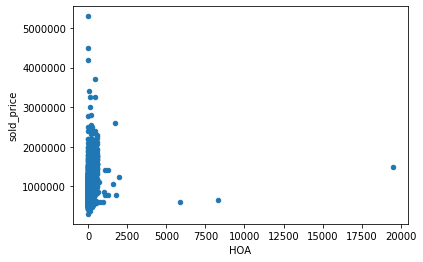

In [316]:
df.plot(kind = 'scatter', x = 'HOA', y = 'sold_price')

plt.show()

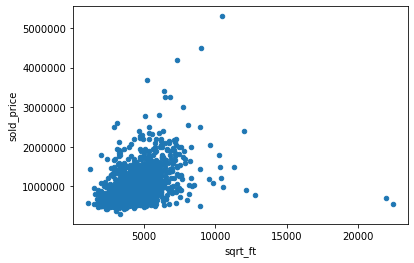

In [317]:
df.plot(kind = 'scatter', x = 'sqrt_ft', y = 'sold_price')

plt.show()

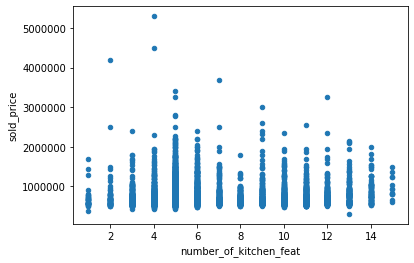

In [318]:
df.plot(kind = 'scatter', x = 'number_of_kitchen_feat', y = 'sold_price')

plt.show()

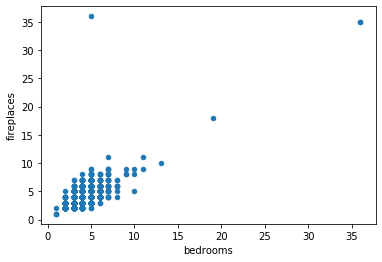

In [319]:
df.plot(kind = 'scatter', x = 'bedrooms', y = 'fireplaces')

plt.show()

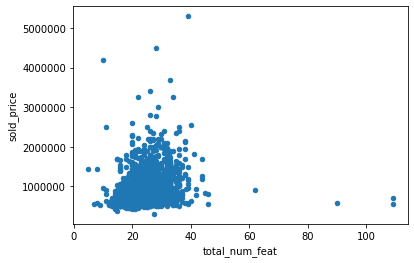

In [320]:
df.plot(kind = 'scatter', x = 'total_num_feat', y = 'sold_price')

plt.show()

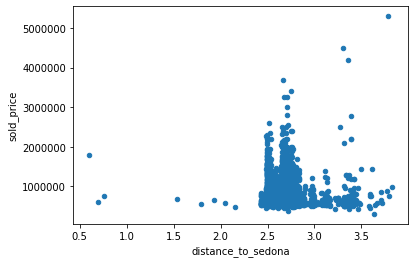

In [321]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'sold_price')

plt.show()


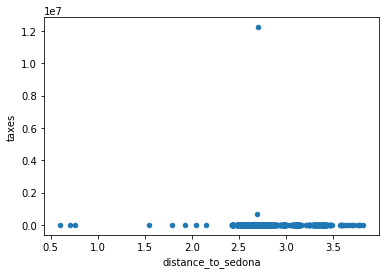

In [322]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'taxes')

plt.show()


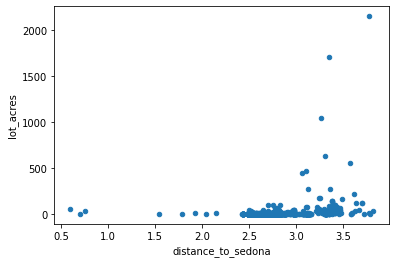

In [323]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'lot_acres')

plt.show()


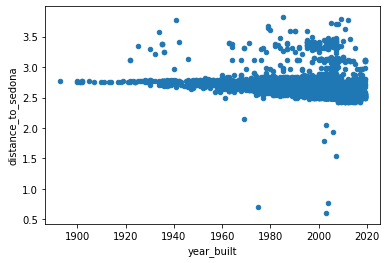

In [324]:
df.plot(kind = 'scatter', x = 'year_built', y = 'distance_to_sedona')

plt.show()


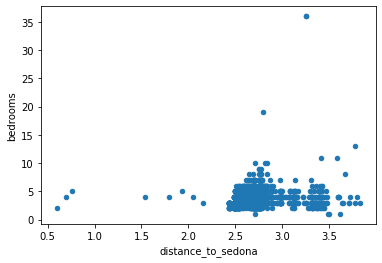

In [325]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'bedrooms')

plt.show()


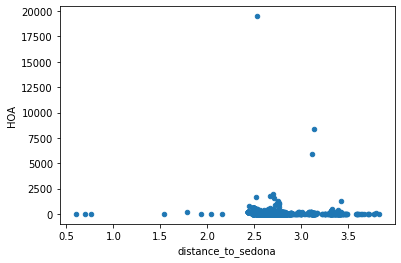

In [326]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'HOA')

plt.show()

# Lets normalize the data

In [327]:
df

MLS  sold_price  zipcode   longitude   latitude  lot_acres  \
0     21530491   5300000.0    85637 -110.378200  31.356362    2154.00   
1     21529082   4200000.0    85646 -111.045371  31.594213    1707.00   
3     21919321   4500000.0    85646 -111.035925  31.645878     636.67   
4     21306357   3411450.0    85750 -110.813768  32.285162       3.21   
5     21528016   3250000.0    85718 -110.910593  32.339090       1.67   
...        ...         ...      ...         ...        ...        ...   
4995  21810382    495000.0    85641 -110.661829  31.907917       4.98   
4996  21908591    550000.0    85750 -110.858556  32.316373       1.42   
4997  21832452    475000.0    85192 -110.755428  32.964708      12.06   
4998  21900515    550000.0    85745 -111.055528  32.296871       1.01   
4999   4111490    450000.0    85621 -110.913054  31.385259       4.16   

         taxes  year_built  bedrooms  bathrooms  sqrt_ft  garage  fireplaces  \
0      5272.00        1941        13       10.0  10500.0     0.0          10   
1     10422.36        1997         2        2.0   7300.0     0.0           2   
3      8418.58        1930         7        5.0   9019.0     4.0           5   
4     15393.00        1995         4        6.0   6396.0     3.0           6   
5     27802.84        1999         3        4.0   6842.0     3.0           4   
...        ...         ...       ...        ...      ...     ...         ...   
4995   2017.00        2005         5        3.0   3601.0     3.0           3   
4996   4822.01        1990         4        3.0   2318.0     3.0           3   
4997   1000.00        1969         3        2.0   1772.0     0.0           2   
4998   5822.93        2009         4        4.0   3724.0     3.0           4   
4999   2814.48        1988         4        4.0   4317.0     0.0           4   

        HOA  number_of_kitchen_feat  number_of_floor_covering  total_num_feat  \
0       0.0                       4                         2            39.0   
1       0.0                       2                         2            10.0   
3       0.0                       4                         3            28.0   
4      55.0                       5                         2            26.0   
5     422.0                       5                         3            22.0   
...     ...                     ...                       ...             ...   
4995    0.0                       9                         2            25.0   
4996   43.0                      10                         2            25.0   
4997    0.0                       6                         1            14.0   
4998    0.0                       9                         2            26.0   
4999    0.0                       5                         2            19.0   

      distance_to_sedona  
0               3.776817  
1               3.353986  
3               3.305587  
4               2.753813  
5               2.670857  
...                  ...  
4995            3.160327  
4996            2.709284  
4997            2.155176  
4998            2.669006  
4999            3.587356  

[4872 rows x 18 columns]

In [328]:
# Drop the following column
df = df.drop('MLS', axis=1)
df = df.drop('zipcode', axis=1)
df = df.drop('longitude', axis=1)
df = df.drop('latitude', axis=1)
df = df.drop('year_built', axis=1)

In [329]:
df


sold_price  lot_acres     taxes  bedrooms  bathrooms  sqrt_ft  garage  \
0      5300000.0    2154.00   5272.00        13       10.0  10500.0     0.0   
1      4200000.0    1707.00  10422.36         2        2.0   7300.0     0.0   
3      4500000.0     636.67   8418.58         7        5.0   9019.0     4.0   
4      3411450.0       3.21  15393.00         4        6.0   6396.0     3.0   
5      3250000.0       1.67  27802.84         3        4.0   6842.0     3.0   
...          ...        ...       ...       ...        ...      ...     ...   
4995    495000.0       4.98   2017.00         5        3.0   3601.0     3.0   
4996    550000.0       1.42   4822.01         4        3.0   2318.0     3.0   
4997    475000.0      12.06   1000.00         3        2.0   1772.0     0.0   
4998    550000.0       1.01   5822.93         4        4.0   3724.0     3.0   
4999    450000.0       4.16   2814.48         4        4.0   4317.0     0.0   

      fireplaces    HOA  number_of_kitchen_feat  number_of_floor_covering  \
0             10    0.0                       4                         2   
1              2    0.0                       2                         2   
3              5    0.0                       4                         3   
4              6   55.0                       5                         2   
5              4  422.0                       5                         3   
...          ...    ...                     ...                       ...   
4995           3    0.0                       9                         2   
4996           3   43.0                      10                         2   
4997           2    0.0                       6                         1   
4998           4    0.0                       9                         2   
4999           4    0.0                       5                         2   

      total_num_feat  distance_to_sedona  
0               39.0            3.776817  
1               10.0            3.353986  
3               28.0            3.305587  
4               26.0            2.753813  
5               22.0            2.670857  
...              ...                 ...  
4995            25.0            3.160327  
4996            25.0            2.709284  
4997            14.0            2.155176  
4998            26.0            2.669006  
4999            19.0            3.587356  

[4872 rows x 13 columns]

In [330]:
def min_max_scaling(column):
    return (column - column.min())/(column.max() - column.min())

In [331]:
for col in df.columns:
    df[col] = min_max_scaling(df[col])

In [335]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [332]:
df

sold_price  lot_acres     taxes  bedrooms  bathrooms   sqrt_ft  \
0        1.00000   1.000000  0.000432  0.342857   0.257143  0.441149   
1        0.78000   0.792477  0.000853  0.028571   0.028571  0.290971   
3        0.84000   0.295569  0.000689  0.171429   0.114286  0.371644   
4        0.62229   0.001481  0.001260  0.085714   0.142857  0.248545   
5        0.59000   0.000766  0.002276  0.057143   0.085714  0.269476   
...          ...        ...       ...       ...        ...       ...   
4995     0.03900   0.002303  0.000165  0.114286   0.057143  0.117374   
4996     0.05000   0.000650  0.000395  0.085714   0.057143  0.057162   
4997     0.03500   0.005590  0.000082  0.057143   0.028571  0.031537   
4998     0.05000   0.000460  0.000477  0.085714   0.085714  0.123146   
4999     0.03000   0.001922  0.000230  0.085714   0.085714  0.150976   

        garage  fireplaces       HOA  number_of_kitchen_feat  \
0     0.000000    0.257143  0.000000                0.214286   
1     0.000000    0.028571  0.000000                0.071429   
3     0.133333    0.114286  0.000000                0.214286   
4     0.100000    0.142857  0.002823                0.285714   
5     0.100000    0.085714  0.021663                0.285714   
...        ...         ...       ...                     ...   
4995  0.100000    0.057143  0.000000                0.571429   
4996  0.100000    0.057143  0.002207                0.642857   
4997  0.000000    0.028571  0.000000                0.357143   
4998  0.100000    0.085714  0.000000                0.571429   
4999  0.000000    0.085714  0.000000                0.285714   

      number_of_floor_covering  total_num_feat  distance_to_sedona  
0                          0.2        0.326923            0.985369  
1                          0.2        0.048077            0.854269  
3                          0.4        0.221154            0.839263  
4                          0.2        0.201923            0.668183  
5                          0.4        0.163462            0.642462  
...                        ...             ...                 ...  
4995                       0.2        0.192308            0.794224  
4996                       0.2        0.192308            0.654377  
4997                       0.0        0.086538            0.482574  
4998                       0.2        0.201923            0.641889  
4999                       0.2        0.134615            0.926626  

[4872 rows x 13 columns]

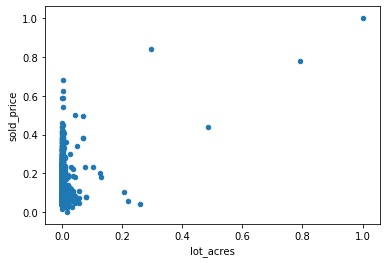

In [333]:
df.plot(kind = 'scatter', x = 'lot_acres', y = 'sold_price')

plt.show()

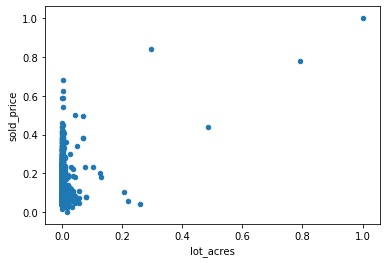

In [334]:
df.plot(kind = 'scatter', x = 'lot_acres', y = 'sold_price')

plt.show()

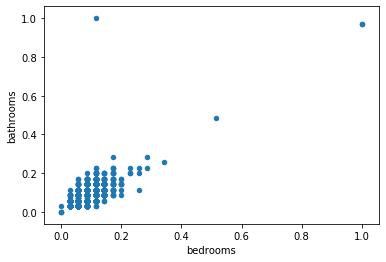

In [336]:
df.plot(kind = 'scatter', x = 'bedrooms', y = 'bathrooms')

plt.show()

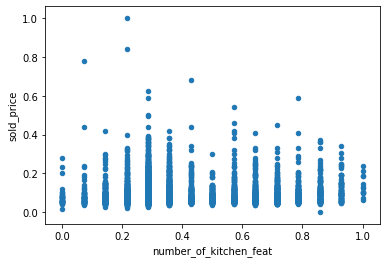

In [337]:
df.plot(kind = 'scatter', x = 'number_of_kitchen_feat', y = 'sold_price')

plt.show()